# Desafio - Recomendação de Produtos

## Case baseado no desafio do Kaggle: "Instacart Market Basket Analysis"

Esse desafio é baseado em uma competição do Kaggle ([https://www.kaggle.com](https://www.kaggle.com)) de 2017, onde é pedido para fazer a predição de se um produto será comprado por dado usuário no carrinho atual, baseado em suas compras anteriores.

Não está no escopo da aula 



Link para o desafio: [https://www.kaggle.com/c/instacart-market-basket-analysis](https://www.kaggle.com/c/instacart-market-basket-analysis)

## Origem dos Dados:

Os dados mostrados nesse desafio são uma amostra extraída do dataset disponibilizado gratuitamente pela empresa Instacart ([https://www.instacart.com/](https://www.instacart.com/)) **\***. São dados reais do banco de dados da empresa, que foram anonimizados para o uso por pesquisadores e em competições de Data Science.

 
###### * “The Instacart Online Grocery Shopping Dataset 2017”, Accessed from [https://www.instacart.com/datasets/grocery-shopping-2017](https://www.instacart.com/datasets/grocery-shopping-2017) on March 10, 2017.

___

# Imports

In [1]:
import numpy as np
import os
import pandas as pd

In [2]:
""" habilitando plots no notebook """
%matplotlib inline

In [3]:
""" plot libs """
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
""" Configurando o Matplotlib para o modo manual """
plt.interactive(False)

# Objetivo :

Analisar o dataset (o mesmo construído na Aula 09) e responder às questões em cada item usando gráficos.

# Importante:

Todos os gráficos devem conter:
* Título
* Rótulos do Eixo X e do Eixo Y

Se mais de um gráfico for plotado em uma única janela, eles devem ter:
* Cores diferentes
* Legenda
* Transparência (na sobreposição)

# Dataset:

O dataset utilizado nesse desafio é um sub-conjunto daquele construído na Aula 9. Para essa aula, será necessário carregar apenas duas colunas: `user_id` e `product_name`.

## Carregando os dados

In [5]:
""" Nota sobre o Warning: 
    O código abaixo levanta um Warning gerado por uma chamada interna do pandas conflitando com o Numpy.
    Não há necessidade de tratar esse Warning no momento, o comportamento do 'read_csv' é funcional para o que queremos.
"""
dataset = pd.read_csv(
    os.path.join("data", "dataset.csv"),
    usecols=["user_id", "product_name"],
    sep=",",
    index_col=0,
    encoding="utf-8"
)

C:\Users\allan\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


## Extração dos dados específicos

In [6]:
product_count = dataset.groupby("user_id").product_name.count()

In [7]:
product_count.describe()

count    114885.000000
mean         10.568394
std           7.946615
min           1.000000
25%           5.000000
50%           9.000000
75%          14.000000
max          80.000000
Name: product_name, dtype: float64

In [8]:
product_count.head(10)

user_id
1     11
2     31
5      9
7      9
8     18
9     22
10     4
13     5
14    11
17     6
Name: product_name, dtype: int64

# Parte 1: Distribuição de Produtos por Usuário

## A) Visualização da Distribuição Original

Avalie a distribuição de dados do `Número de Produtos` por `Usuário`, respondendo a cada item. 

### A.1) Visualização

Construa uma visualização composta que mostre a distribuição de dados e os outliers.

Depois, responda às perguntas:
* Qual o tipo dessa distribuição? 
* Existem Outliers? Descreva-os.

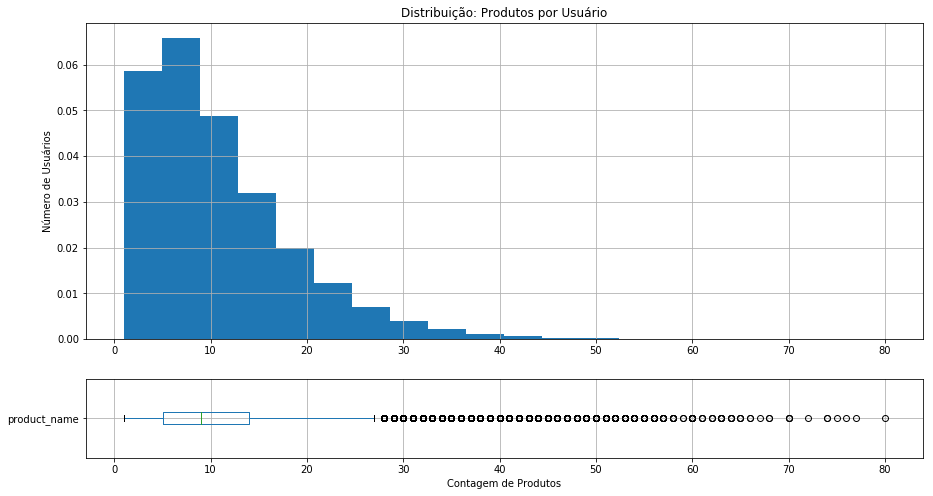

In [9]:
f, axes = plt.subplots(
    2, 1, 
    figsize=(15, 8), 
    sharex=False,
    gridspec_kw={"height_ratios": [4, 1]}
)

product_count.hist(bins=20, figsize=(15,8), normed=True, ax=axes[0], label="Distribuição")
product_count.plot(kind="box", vert=False, ax=axes[1])

axes[0].set(title="Distribuição: Produtos por Usuário")
axes[1].set(xlabel="Contagem de Produtos")
axes[0].set(ylabel="Número de Usuários")
axes[0].grid(True)
axes[1].grid(True)

plt.show()

### A.2) Cortes

Proponha cortes de usuários de forma que não se percam muitos dados e que a distribuição seja mantida. 

Adicione os cortes à visualização usando `segmentos pontilhados de reta` e `textos com os valores dos cortes`.

##### Cálculo do corte de Outliers

Vamos utilizar o método da `Amplitude Inter-Quartil`, ou `IQR`. Para mais informações, veja [esse link](https://www.miniwebtool.com/outlier-calculator/).

In [10]:
q1, q3 = product_count.describe()[["25%", "75%"]]
iqr = q3 - q1

l_sup = q3 + 1.5 * iqr
l_inf = q1 - 1.5 * iqr

print("Corte Superior: {}; Corte Inferior: {}".format(l_sup, l_inf))

Corte Superior: 27.5; Corte Inferior: -8.5


##### Solução

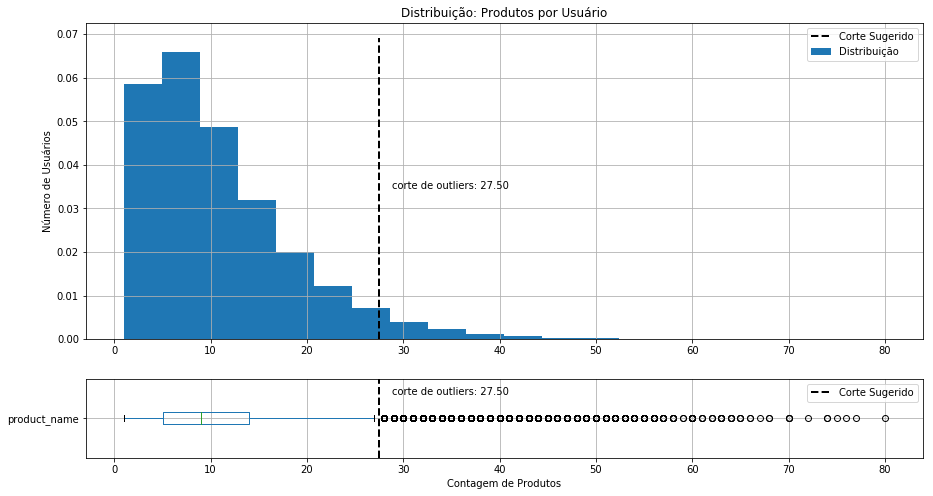

In [11]:
# mesmo código da solução anterior
f, axes = plt.subplots(
    2, 1, 
    figsize=(15, 8), 
    sharex=False,
    gridspec_kw={"height_ratios": [4, 1]}
)

product_count.hist(bins=20, figsize=(15,8), normed=True, ax=axes[0], label="Distribuição")
product_count.plot(kind="box", vert=False, ax=axes[1])

axes[0].set(title="Distribuição: Produtos por Usuário")
axes[1].set(xlabel="Contagem de Produtos")
axes[0].set(ylabel="Número de Usuários")
axes[0].grid(True)
axes[1].grid(True)

# plots do corte superior
x = [l_sup, l_sup]

y0 = axes[0].get_ylim()
axes[0].plot(x, y0, "--k", label='Corte Sugerido', linewidth=2)
axes[0].text(x[0] * 1.05, np.mean(y0), s="corte de outliers: {:.2f}".format(l_sup))
axes[0].legend()

y1 = axes[1].get_ylim()
axes[1].plot(x, y1, "--k", label='Corte Sugerido', linewidth=2)
axes[1].text(x[0] * 1.05, np.mean(y1) * 1.3, s="corte de outliers: {:.2f}".format(l_sup))
axes[1].legend()

# mostra a imagem final
plt.show()

### A.3) Nova Distribuição

Elimine os outliers e construa outro plot da nova distribuição.

In [12]:
product_count_no_outliers = product_count[product_count < l_sup]
product_count_no_outliers.describe()

count    110257.000000
mean          9.577514
std           6.294016
min           1.000000
25%           5.000000
50%           8.000000
75%          13.000000
max          27.000000
Name: product_name, dtype: float64

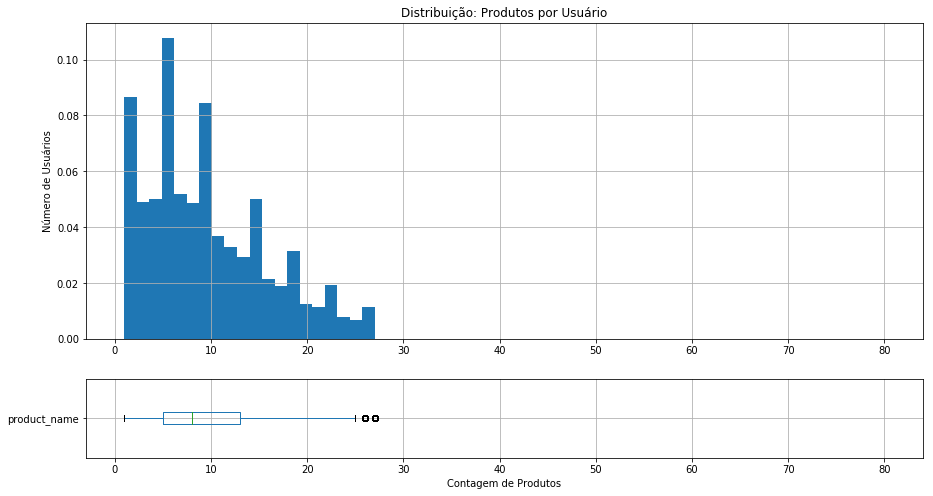

In [13]:
# mesmo código da solução anterior
f, axes = plt.subplots(
    2, 1, 
    figsize=(15, 8), 
    sharex=False,
    gridspec_kw={"height_ratios": [4, 1]}
)

product_count_no_outliers.hist(bins=20, figsize=(15,8), normed=True, ax=axes[0], label="Distribuição")
product_count_no_outliers.plot(kind="box", vert=False, ax=axes[1])

axes[0].set(title="Distribuição: Produtos por Usuário")
axes[1].set(xlabel="Contagem de Produtos")
axes[0].set(ylabel="Número de Usuários")
axes[0].grid(True)
axes[1].grid(True)

# mantendo o mesmo tamanho de eixo dos plots anteriores
axes[0].set(ylabel="Número de Usuários", xlim=(-3, 84))
axes[1].set(xlabel="Contagem de Produtos", xlim=(-3, 84))

plt.show()

## B) Visualização da Distribuição Transformada

Uma técnica que é muito usada para compreender melhor dados de uma distribuição como essa é  a aplicação do `logaritmo` aos dados originais. Para saber mais sobre essa função matemática, consulte [esta referência](https://pt.wikibooks.org/wiki/Matem%C3%A1tica_elementar/Logaritmos).

Aplique o `logaritmo de base 10` à massa de dados e responda aos itens:

B.1) Construa uma visualização composta que mostre a distribuição de dados e os outliers.

B.2) Responda às perguntas:
* Qual o tipo dessa distribuição? 
* Existem Outliers? Descreva-os.

B.3) Proponha cortes de usuários de forma que não se percam muitos dados e que a distribuição seja mantida. Adicione os cortes à visualização usando `segmentos pontilhados de reta` e `textos com os valores dos cortes`.

B.4) Elimine os outliers e construa outro plot da nova distribuição.

### Transformação dos dados

In [14]:
product_count_log = product_count.map(np.log10)

In [15]:
product_count_log.describe()

count    114885.000000
mean          0.891264
std           0.368703
min           0.000000
25%           0.698970
50%           0.954243
75%           1.146128
max           1.903090
Name: product_name, dtype: float64

In [16]:
product_count_log.head()

user_id
1    1.041393
2    1.491362
5    0.954243
7    0.954243
8    1.255273
Name: product_name, dtype: float64

### B.1) Visualização

Construa uma visualização composta que mostre a distribuição de dados e os outliers.

Depois, responda às perguntas:
* Qual o tipo dessa distribuição? 
* Existem Outliers? Descreva-os.

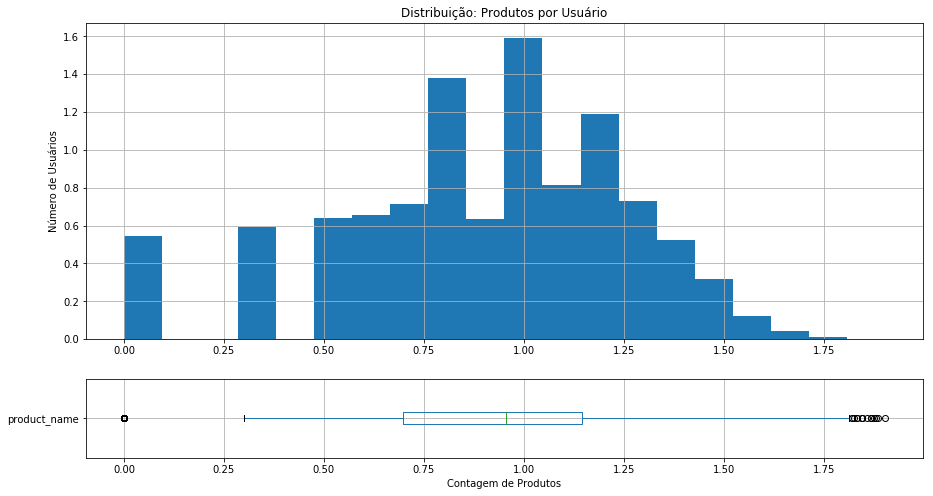

In [17]:
f, axes = plt.subplots(
    2, 1, 
    figsize=(15, 8), 
    sharex=False,
    gridspec_kw={"height_ratios": [4, 1]}
)

product_count_log.hist(bins=20, figsize=(15,8), normed=True, ax=axes[0], label="Distribuição")
product_count_log.plot(kind="box", vert=False, ax=axes[1])

axes[0].set(title="Distribuição: Produtos por Usuário")
axes[1].set(xlabel="Contagem de Produtos")
axes[0].set(ylabel="Número de Usuários")
axes[0].grid(True)
axes[1].grid(True)

plt.show()

### B.2) Cortes

Proponha cortes de usuários de forma que não se percam muitos dados e que a distribuição seja mantida. 

Adicione os cortes à visualização usando `segmentos pontilhados de reta` e `textos com os valores dos cortes`.

In [18]:
# cortes
q1, q3 = product_count_log.describe()[["25%", "75%"]]
iqr = q3 - q1

l_sup = q3 + 1.5 * iqr
l_inf = q1 - 1.5 * iqr

print("Corte Superior: {}; Corte Inferior: {}".format(l_sup, l_inf))

Corte Superior: 1.8168650826915667; Corte Inferior: 0.028232957322690155


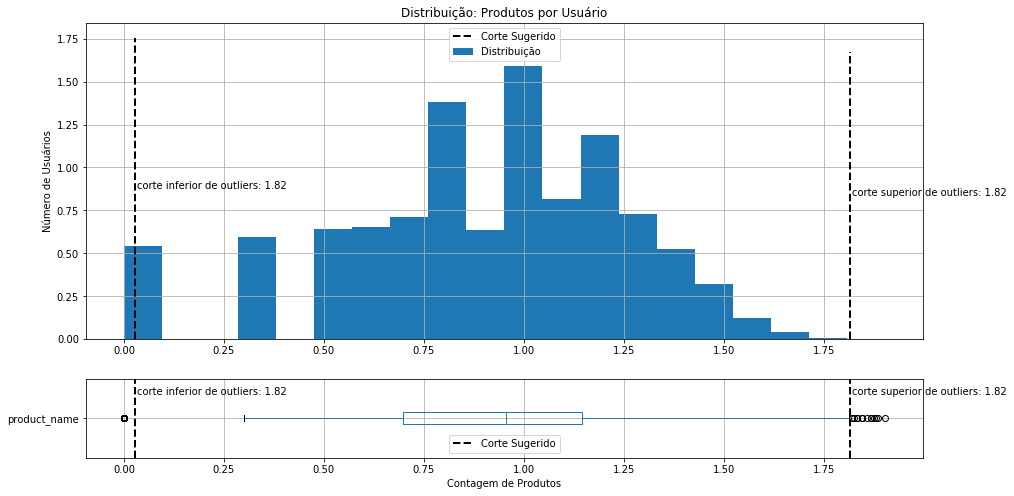

In [19]:
f, axes = plt.subplots(
    2, 1, 
    figsize=(15, 8), 
    sharex=False,
    gridspec_kw={"height_ratios": [4, 1]}
)

product_count_log.hist(bins=20, figsize=(15,8), normed=True, ax=axes[0], label="Distribuição")
product_count_log.plot(kind="box", vert=False, ax=axes[1])

axes[0].set(title="Distribuição: Produtos por Usuário")
axes[1].set(xlabel="Contagem de Produtos")
axes[0].set(ylabel="Número de Usuários")
axes[0].grid(True)
axes[1].grid(True)

# plots do corte superior
x = [l_sup, l_sup]

y0 = axes[0].get_ylim()
axes[0].plot(x, y0, "--k", label='Corte Sugerido', linewidth=2)
axes[0].text(x[0] + .005, np.mean(y0), s="corte superior de outliers: {:.2f}".format(l_sup))
axes[0].legend()

y1 = axes[1].get_ylim()
axes[1].plot(x, y1, "--k", label='Corte Sugerido', linewidth=2)
axes[1].text(x[0] + .005, np.mean(y1) * 1.3, s="corte superior de outliers: {:.2f}".format(l_sup))
axes[1].legend()

# plots do corte inferior
x = [l_inf, l_inf]

y0 = axes[0].get_ylim()
axes[0].plot(x, y0, "--k", linewidth=2)
axes[0].text(x[0] + .005, np.mean(y0), s="corte inferior de outliers: {:.2f}".format(l_sup))

y1 = axes[1].get_ylim()
axes[1].plot(x, y1, "--k", label='Corte Sugerido', linewidth=2)
axes[1].text(x[0] + .005, np.mean(y1) * 1.3, s="corte inferior de outliers: {:.2f}".format(l_sup))

plt.show()

### B.3) Nova Distribuição

Elimine os outliers e construa outro plot da nova distribuição.

In [20]:
index = (product_count_log < l_sup) & (product_count_log > l_inf)
product_count_log_no_outliers = product_count_log[index]
product_count_log_no_outliers.describe()

count    108929.000000
mean          0.939741
std           0.312367
min           0.301030
25%           0.698970
50%           0.954243
75%           1.176091
max           1.812913
Name: product_name, dtype: float64

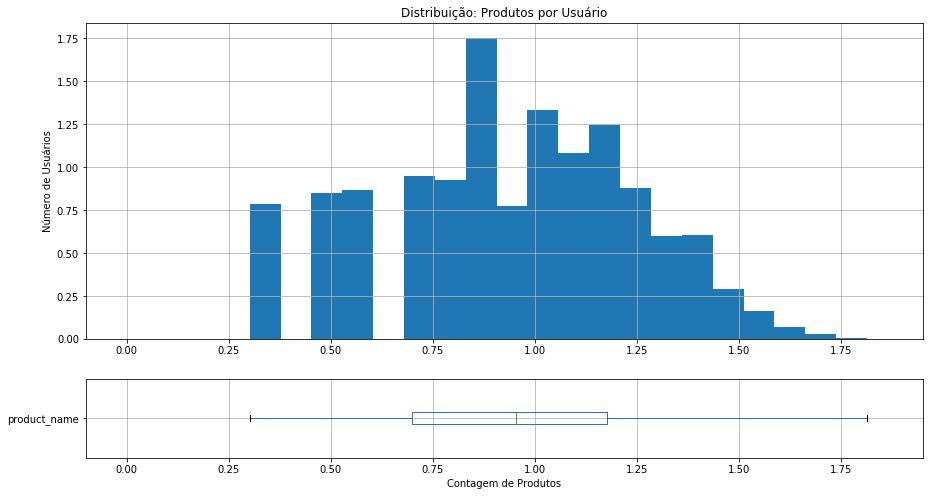

In [21]:
# mesmo código da solução anterior
f, axes = plt.subplots(
    2, 1, 
    figsize=(15, 8), 
    sharex=False,
    gridspec_kw={"height_ratios": [4, 1]}
)

product_count_log_no_outliers.hist(bins=20, figsize=(15,8), normed=True, ax=axes[0], label="Distribuição")
product_count_log_no_outliers.plot(kind="box", vert=False, ax=axes[1])

axes[0].set(title="Distribuição: Produtos por Usuário")
axes[1].set(xlabel="Contagem de Produtos")
axes[0].set(ylabel="Número de Usuários")
axes[0].grid(True)
axes[1].grid(True)

# mantendo o mesmo tamanho de eixo dos plots anteriores
axes[0].set(ylabel="Número de Usuários", xlim=(-0.1, 1.95))
axes[1].set(xlabel="Contagem de Produtos", xlim=(-0.1, 1.95))

plt.show()

# Parte 2: Recomendação Simples de Produtos

Um sistema de recomendação bem rudimentar pode ser construído usando a teoria de [`Collaborative Filtering`](https://en.wikipedia.org/wiki/Collaborative_filtering). 

Na figura abaixo está mostrado um exemplo simples:

![Collaborative Filtering](images/Collaborative_filtering.gif)

A idéia principal é representar um `usuário` pelo seu `perfil de compras`, ou seja, o usuário será representado por **todos os produtos** que ele já comprou.

## Construção do Dataset

Como serão usados métodos computacionais muito pesados, será necessário reduzir bastante a quantidade de dados utilizados. Dessa forma, serão usados apenas os **1% dos dados de usuários que compraram mais produtos** do dataset.

### Selecionando os usuários

In [22]:
product_count.describe(percentiles=[.1, .25, .5, .75, .99])

count    114885.000000
mean         10.568394
std           7.946615
min           1.000000
10%           2.000000
25%           5.000000
50%           9.000000
75%          14.000000
99%          37.000000
max          80.000000
Name: product_name, dtype: float64

In [23]:
selected = product_count[product_count >= 37].index
selected.shape

(1194,)

In [24]:
dataset.loc[selected].shape

(51439, 1)

In [25]:
dataset.loc[selected].head()

,product_name
user_id,
238,Lunchables Turkey & American Cheese with Crackers
238,Light Red Raspberry Yogurt
238,Farmhouse Hearty White Bread
238,Lunchables Turkey & American Cheese Cracker St...
238,Strawberry Banana


### Criando a Tabela de Ocorrências

Uma `Tabela de Ocorrências` relaciona quantos produtos um usuário comprou **para cada produto**. 

Exemplo:

a) Dado Original:

| user_id | product_name  |
|:------- |:------------- |
| 12345   | Ground Coffee |
| 12345   | White Sugar   |
| 12345   | Bread         |
| 67890   | Ground Coffee |
| 67890   | A Type Milk   |
| 67890   | Vodka         |
| 67890   | Fudge Brownie |

b) Tabela de Ocorrências:

| user_id | Ground Coffee | White Sugar   | Bread         | A Type Milk   | Vodka         | Fudge Brownie |
|:------- |:------------- |:------------- |:------------- |:------------- |:------------- |:------------- |
| 12345   | 1             | 1             | 1             | 0             | 0             | 0             |
| 67890   | 1             | 0             | 0             | 1             | 1             | 1             |




In [26]:
temp = dataset.loc[selected].reset_index()
users = temp.user_id
prods = temp.product_name

In [27]:
user_prod = pd.crosstab(users, prods)
user_prod.head(10)

product_name,& Go! Hazelnut Spread + Pretzel Sticks,0% Fat Blueberry Greek Yogurt,0% Fat Free Organic Milk,0% Fat Greek Yogurt Black Cherry on the Bottom,0% Fat Vanilla Greek Yogurt,0% Greek Strained Yogurt,0% Greek Yogurt Black Cherry on the Bottom,"0% Greek, Blueberry on the Bottom Yogurt",1 % Lowfat Milk,1 Apple + 1 Mango Fruit Bar,...,from Concentrate Mango Nectar,gelato Coffee Toffee,in 100% Juice Mixed Fruit,of Hanover 100 Calorie Pretzels Mini,smartwater® Electrolyte Enhanced Water,vitaminwater® XXX Acai Blueberry Pomegranate,with Crispy Almonds Cereal,with Olive Oil Mayonnaise,with Olive Oil Mayonnaise Dressing,with Sweet & Smoky BBQ Sauce Cheeseburger Sliders
user_id,,,,,,,,,,,,,,,,,,,,,
238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
375,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
863,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
890,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
982,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1239,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1478,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1732,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1810,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Redução de Dimensionalidade

A `Tabela de Ocorrências` é uma matriz muito grande e muito **esparsa**, i.e. possui muitas colunas e pouca informação. Por pouca informação pode-se entender que menos de 1% da matriz é composta por elementos **não zeros**.

Para esse tipo de dado, em que é necessária muita memória e processamento para se extrair informações relevantes, usam-se técnicas de **redução de dimensionalidade**. Essas técnicas têm como objetivo condensar (ou mesmo comprimir) a informação esparsa em uma representação muito menor e densa.

Nesse desafio será utilizado a técnica linear de extração de componentes principais, ou `Principal Component Analysis` (`PCA`). Para saber mais sobre essa ferramenta, veja os links abaixo:

- [Teoria do PCA (Wikipédia)](https://en.wikipedia.org/wiki/Principal_component_analysis)
- [Implementação do Scikit-Learn](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

A figura abaixo mostra um exemplo de PCA aplicado a um conjunto de dados de 2 variáveis (`x` e `y`). Pode-se observar que os novos eixos encontrados descrevem muito mais facilmente a distribuição de dados do que os eixos de `x` e `y` originais.

![GaussianScatterPCA](images/GaussianScatterPCA.svg)


Sem entrar muito em detalhes técnicos de implementação do PCA, essa técnica descorrelaciona (torna **linearmente independentes**) os dados originais e os ordena do mais importante (i.e. aquele que carrega **mais informação**) para o menos; com isso, pode-se escolher manter apenas as nosvas dimensões que **melhor explicam** os dados e jogar fora o resto. 

Nesse desafio, vamos reduzir a tabela de dados das `12.962` colunass originais para apenas `100` usando a implementação de PCA do `scikit-learn`. 

In [28]:
from sklearn.decomposition import PCA

user_prod_pca = pd.DataFrame(
    index=user_prod.index,
    data=PCA(100).fit_transform(user_prod)
)
user_prod_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
user_id,,,,,,,,,,,,,,,,,,,,,
238,-0.976656,-0.564291,-0.190293,0.136320,-0.043624,-0.138039,-0.197041,-0.069407,-0.234356,0.105695,...,0.036791,0.196039,-0.332584,1.108016,0.090776,0.122924,0.373069,1.304701,0.363430,-0.122881
375,-0.127334,-0.063303,0.092113,0.727027,-1.127423,-0.314869,0.005626,-0.335426,-0.609052,0.287322,...,-0.325027,-0.380033,0.531384,-0.545344,-0.165574,0.067783,0.032436,0.192858,0.043868,0.119884
863,1.093155,-0.430329,-0.195144,0.505886,-1.103765,0.436582,-0.517517,0.882715,-0.665133,-0.349605,...,0.034380,-0.344956,0.099568,-0.032879,-0.198831,-0.651576,-0.085738,-0.430568,-0.015067,0.147979
890,0.863729,-0.164227,-0.142999,0.383600,0.202114,-0.539493,-0.422051,-0.291819,0.472842,0.302166,...,0.229093,-0.228145,0.119942,0.072250,0.117072,-0.144793,0.108123,-0.030835,0.259456,-0.191760
982,-0.166054,0.229982,0.808889,0.127074,-0.531096,-0.488581,0.069686,0.187816,0.345945,-0.042732,...,-0.051637,-0.153500,0.061027,-0.092806,-0.134474,-0.165568,-0.308137,0.469183,0.213330,0.158586


Para toda a Parte 2 do desafio, será usada a tabela gerada por PCA `user_prod_pca`. 

## A) Visualização e Seleção dos Usuários

Como o PCA ordena as _features_ da mais importante para a menos importante, as duas primeiras colunas da tabela `user_prod_pca` podem ser usadas para visualização dos usuários do sistema. 

Como temos muitos usuários ainda (`1.194`), será necessário escolher alguns poucos para observar a `similaridade` entre eles.   



### A.1) Visualização

Crie um `scatter plot` que mostra a representação 2D de todos os usuários em `user_prod_pca` usando as colunas `0` para  o eixo `x` e a coluna `1` para o eixo `y`. 

Esse gráfico deve ter as seguintes características:
* Tamanho da Figura: 15 x 15
* Título e Rótulos para os eixos X e Y
* Tamanho do símbolo no mínimo igual a 60
* Transparência, para verificar dados que eventualmente se sobreponham.

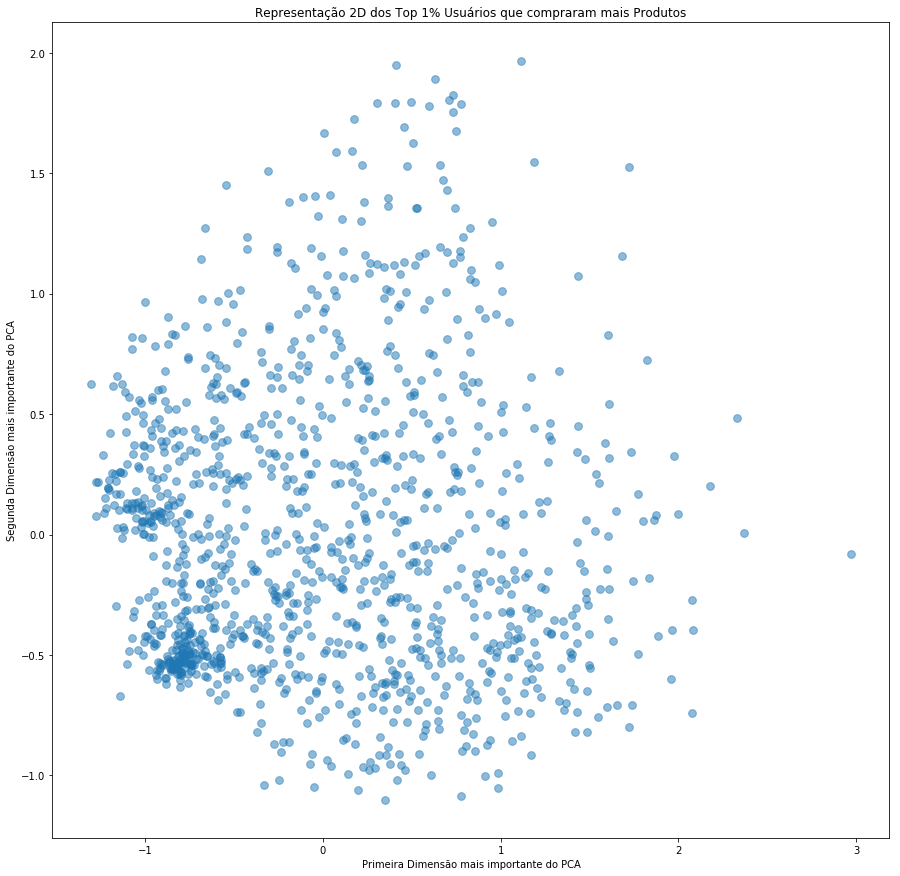

In [29]:
user_prod_pca.plot(
    kind="scatter", 
    x=0, y=1,    
    s=60,
    alpha=0.5,
    figsize=(15,15)
)
plt.title("Representação 2D dos Top 1% Usuários que compraram mais Produtos")
plt.xlabel("Primeira Dimensão mais importante do PCA")
plt.ylabel("Segunda Dimensão mais importante do PCA")
plt.show()

### A.2) Seleção

Crie outro `scatter plot` que mostra apenas uma parte do domínio onde há uma maior concentração de usuários; esse gráfico será parecido com um **zoom** nessa parte do domínio. 

Sugestão do corte:
- `-0.7 < X < -0.5`
- `-0.6 < Y < -0.4`

Esse gráfico deve ter as mesmas características do anterior e ainda mostrar, para cada usuário, o texto contendo seu `user_id`.

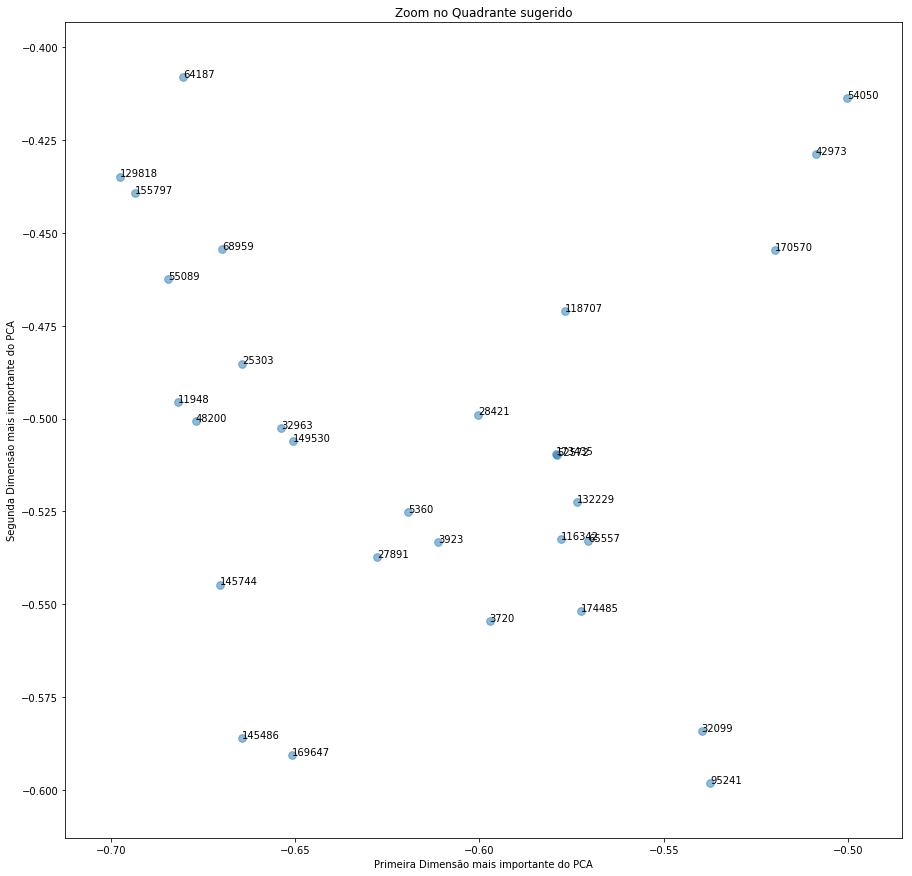

In [30]:
index = (user_prod_pca.loc[:, 0] >= -0.7) & \
        (user_prod_pca.loc[:, 0] < -0.5) & \
        (user_prod_pca.loc[:, 1] >= -0.6) & \
        (user_prod_pca.loc[:, 1] < -0.4)

selected_users = user_prod_pca[index]

selected_users.plot(
    kind="scatter", 
    x=0, y=1,    
    s=60,
    alpha=0.5,
    figsize=(15,15)
)

for label, x, y in selected_users.reset_index().values[:, :3]:
    plt.text(x=x, y=y, s=int(label))
    
plt.title("Zoom no Quadrante sugerido")
plt.xlabel("Primeira Dimensão mais importante do PCA")
plt.ylabel("Segunda Dimensão mais importante do PCA")

plt.show()

## B) Similaridade usando Correlação entre Usuários

Para saber se um usuário é `similar` a outro, pode-se utilizar várias métricas de similaridade. Como o método de redução de dimensionalidade escolhido é linear, pode-se usar o `coeficiente de correlação de Pearson` entre as representações de dimensão `100` dos usuários como métrica de similaridade. Para saber mais sobre a correlação de Pearson, veja [este link da Wikipédia](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient).

A interpretação do coeficiente `r` como métrica de similaridade é a seguinte:
* Se `|r|` é próximo de `1`, os elementos são **muito similares**;
* Se `|r|` é próximo de `0`, os elementos são **muito diferentes**.


### B.1) Visualização da Correlação

Selecione `10` usuários do `item A`, dentre próximos e distantes, e visualize a `correlação` entre todos eles.

Dica 1: use um método que mostre a correlação de todos contra todos em vez de criar uma visualização para cada dupla.

Dica 2: A maioria das funções de correlação enxergam os dados por coluna em vez de linhas; tente transpor a sua matriz caso o resultado esteja estranho. 

##### Nota

Para que seja possível processar os dados sem problemas de memória, serão selecionados de 3 a 6 usuários com as maiores e as menores correlações.

In [31]:
# calculando matriz de correlações e transformando em uma Series
correlacoes = selected_users.T.corr()
correlacoes = correlacoes.stack()
correlacoes = correlacoes.to_frame().rename(columns={0: "correl"})

# ordenando os user_ids para identificar duplicatas
correlacoes.index = correlacoes.index.rename(names=["user_1", "user_2"])
correlacoes = correlacoes.reset_index()
correlacoes[["user_1", "user_2"]] = correlacoes[["user_1", "user_2"]].apply(sorted, axis=1)

# eliminando autocorrelações
correlacoes = correlacoes[correlacoes.user_1 != correlacoes.user_2]

# eliminando correlações duplicadas
correlacoes = correlacoes.drop_duplicates()

# ordenando as correlações
correlacoes = correlacoes.sort_values(by="correl")

# usando user_1 e user_2 como indices
correlacoes = correlacoes.set_index(["user_1", "user_2"])


correlacoes

correl
user_1 user_2          
169647 170570 -0.091555
95241  174485 -0.080124
32099  169647 -0.071970
68959  169647 -0.069597
95241  145744 -0.049816
3720   95241  -0.046893
54050  169647 -0.045168
32099  170570 -0.045126
       118707 -0.042424
       68959  -0.040396
       48200  -0.040360
5360   116342 -0.035635
       68959  -0.028966
116342 169647 -0.023997
3923   95241  -0.023390
54050  116342 -0.018984
116342 132229 -0.014183
64187  68959  -0.012302
32099  145744 -0.010807
65557  170570 -0.008983
55089  149530 -0.008620
145486 169647 -0.008265
54050  68959  -0.007873
5360   64187  -0.005594
3720   32099  -0.000953
32099  32963   0.000934
5360   32099   0.001500
145486 170570  0.004003
48200  118707  0.005389
55089  118707  0.006290
...                 ...
       65557   0.348184
52572  65557   0.350829
173435 174485  0.355936
3923   54050   0.357462
27891  52572   0.359186
52572  129818  0.373545
27891  132229  0.380533
65557  145486  0.383108
27891  129818  0.386130
28421  32963   0.388079
68959  145744  0.390209
42973  173435  0.391338
3923   52572   0.414687
54050  173435  0.415097
65557  173435  0.418204
42973  55089   0.422779
129818 173435  0.423458
11948  55089   0.426688
54050  174485  0.455033
116342 129818  0.463692
25303  173435  0.474548
11948  145486  0.477522
27891  173435  0.492540
52572  173435  0.507948
25303  42973   0.527674
27891  54050   0.541347
3923   145744  0.550375
3720   174485  0.560903
11948  95241   0.604983
5360   169647  0.751651

[435 rows x 1 columns]

In [32]:
index = pd.MultiIndex.from_tuples(
    [
        correlacoes.correl.argmin(),           # maior correlação negativa absoluta
        correlacoes.correl.map(abs).argmin(),  # menor correlação absoluta
        correlacoes.correl.argmax(),           # maior correlação positiva absoluta
    ], 
    names=["user_1", "user_2"]
)
correlacoes.loc[index]

,,correl
user_1,user_2,
169647,170570,-0.091555
32099,32963,0.000934
5360,169647,0.751651


In [33]:
u_ids = pd.unique(index.to_frame().values.reshape((6)))
selected_correl = selected_users.loc[u_ids].T.corr()
selected_correl

user_id,169647,170570,32099,32963,5360
user_id,,,,,
169647,1.000000,-0.091555,-0.071970,0.100169,0.751651
170570,-0.091555,1.000000,-0.045126,0.212076,0.006643
32099,-0.071970,-0.045126,1.000000,0.000934,0.001500
32963,0.100169,0.212076,0.000934,1.000000,0.024563
5360,0.751651,0.006643,0.001500,0.024563,1.000000


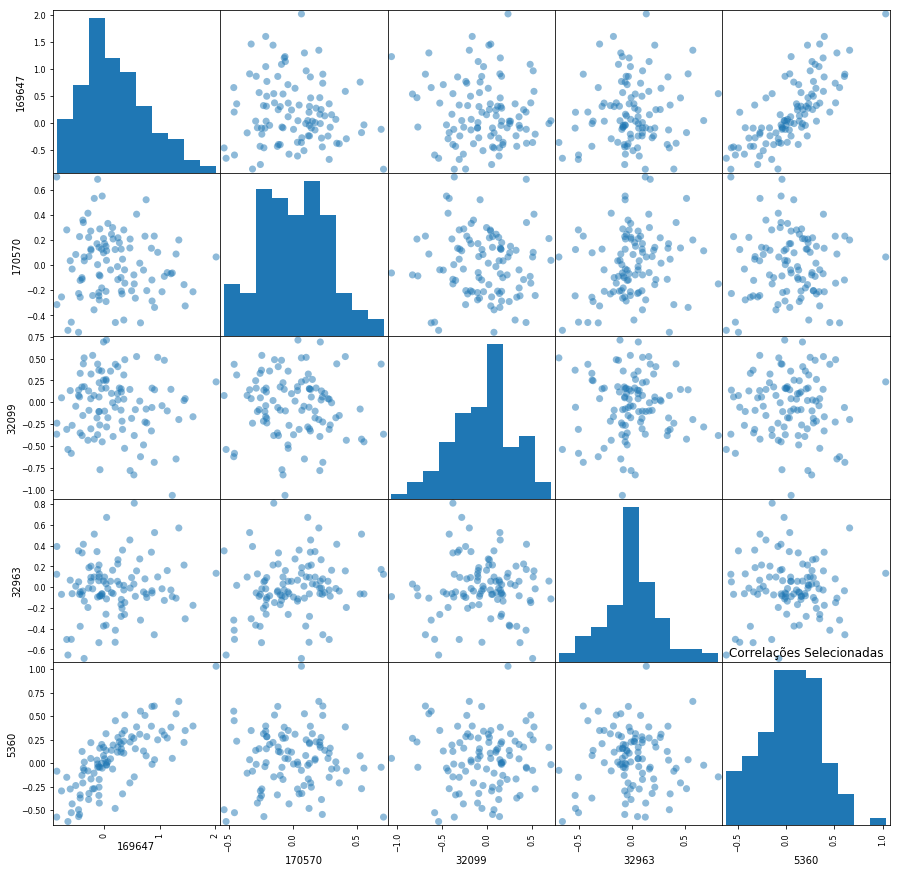

In [34]:
pd.plotting.scatter_matrix(
    selected_users.T.loc[:, u_ids], 
    figsize=(15, 15), 
    s=200,                            # Tamanho do Marker para o Scatter Plot
    alpha=.5                          # Transparência para o Scatter Plot
)

plt.title("Correlações Selecionadas")
plt.show()

### B.2) Verificando a Similaridade das Compras dos Usuários

Escolha dois usuários com uma correlação alta e verifique os produtos que ambos compraram. Faça o mesmo depois para usuários de correlação baixa.

##### Correlação Alta

In [35]:
user_id_1 = 5360
prods_user_1 = user_prod.columns[user_prod.loc[user_id_1].astype(bool)]

user_id_2 = 169647
prods_user_2 = user_prod.columns[user_prod.loc[user_id_2].astype(bool)]

# quantidade de produtos para ambos os usuários
print("User {}: {} produtos".format(user_id_1, prods_user_1.shape[0]))
print("User {}: {} produtos".format(user_id_2, prods_user_2.shape[0]))

User 5360: 41 produtos
User 169647: 75 produtos


In [36]:
# produtos em comum
common_prods = prods_user_1 & prods_user_2
print("Produtos em Comum: {} produtos".format(common_prods.shape[0]))
print(" - " + "\n - ".join(common_prods.sort_values()))

Produtos em Comum: 12 produtos
 - Dark Coconut Toffee Organic Chocolate
 - Organic Deep Dark Sea Salt Chocolate
 - Organic Orange Fruit Juice
 - Organic Quinoa Dark Chocolate Bar
 - Organic Raw Multigreen Kobmbucha
 - Organic Reduced Fat 2% Milk
 - Peanut Butter Whole Grain Clusters
 - Sweet Batard
 - Thick & Crispy Tortilla Chips
 - Thin & Light Tortilla Chips
 - Total 2% Greek Strained Yogurt with Cherry 5.3 oz
 - Total 2% Lowfat Greek Strained Yogurt with Peach


In [37]:
# Produtos Exclusivos do User 1
excllusive_prods = prods_user_1.difference(prods_user_2)
print("Produtos Exclusivos no User 1: {} produtos".format(excllusive_prods.shape[0]))
print(" - " + "\n - ".join(excllusive_prods.sort_values()))

Produtos Exclusivos no User 1: 29 produtos
 - 70% Dark Chocolate Bar
 - Almonds & Sea Salt in Dark Chocolate
 - Blackberry Yogurt
 - Coffee Crunch In Dark Chocolate
 - Cold-Pressed Organic Apple
 - Finocchiona Salami
 - Healthy Grains Oats & Honey Clusters with Toasted Coconut Gluten Free
 - Hibiscus Organic Raw Kombucha
 - Kombucha  Bilberry No. 9
 - Mexican Chocolate Yogurt
 - Mortadella
 - Olive Bread
 - Organic Cultured Cream Cheese Spread
 - Organic Dark Salted Burnt Caramel Chocolate Bar
 - Organic Teas Black Tea Organic English Breakfast Tea Bags - 16 CT
 - Passionberry Bliss Kombucha Drink
 - Peach Pear Flavored Sparkling Water
 - Peanut Butter Cereal
 - Pita Chips Simply Naked
 - Potato Chip Milk Chocolate
 - Rich Dark Chocolate
 - Small Walnut Levain Bread
 - Synergy Organic & Raw Green Chia Kombucha
 - Total 0% Cherry Nonfat Yogurt
 - Total 2% All Natural Greek Strained Yogurt with Honey
 - Total 2% Lowfat Greek Strained Yogurt With Blueberry
 - Total 2% Yogurt Key Lime
 - T

In [38]:
# Produtos Exclusivos do User 2
excllusive_prods = prods_user_2.difference(prods_user_1)
print("Produtos Exclusivos do User 2: {} produtos".format(excllusive_prods.shape[0]))
print(" - " + "\n - ".join(excllusive_prods.sort_values()))

Produtos Exclusivos do User 2: 63 produtos
 - 100% Apple Juice
 - 100% Lime Juice
 - 6 OZ LA PANZANELLA CROSTINI ORIGINAL CRACKERS
 - 72% Cacao Twilight Delight Intense Dark Bar
 - Ale, Hop Stoopid
 - Big Eye IPA
 - Carrot Sticks
 - Celery Sticks
 - Chocolate Milk 1% Milkfat
 - Coconut Water
 - Crispy Sea Salt Baked Gourmet Crackers
 - Dark Belgian Beer
 - Dark Chocolate, Stone Ground, Organic, Toffee Almond & Sea Salt
 - English Breakfast Tea Bags
 - Enlightened Organic Raw Kombucha
 - Excellence 85% Cocoa Extra Dark Chocolate
 - Fresh Roasted Tomate & Chile Asado Medium Salsa
 - Fresh Squeezed IPA
 - Garlic & Wine Sopressata Salami
 - Green Tea With Ginseng and Honey
 - Hazelnut Toffee Dark Chocolate Bar
 - Honey Bunches of Oats Honey Roasted with Almonds Cereal
 - Icelandic Style Fat Free Plain Yogurt
 - Italian Batard
 - Jacob's Wonderbar Dark Roast
 - Kombucha Organic & Raw Tantric Tumeric
 - Kombucha, Organic Raw, Lavender No. 3
 - Mint Ice Cream Sandwiches
 - Natural 72% Dark Ch

##### Correlação Baixa

In [39]:
user_id_1 = 5360
prods_user_1 = user_prod.columns[user_prod.loc[user_id_1].astype(bool)]

user_id_2 = 32099
prods_user_2 = user_prod.columns[user_prod.loc[user_id_2].astype(bool)]

# quantidade de produtos para ambos os usuários
print("User {}: {} produtos".format(user_id_1, prods_user_1.shape[0]))
print("User {}: {} produtos".format(user_id_2, prods_user_2.shape[0]))

User 5360: 41 produtos
User 32099: 47 produtos


In [40]:
# produtos em comum
common_prods = prods_user_1 & prods_user_2
print("Produtos em Comum: {} produtos".format(common_prods.shape[0]))
print(" - " + "\n - ".join(common_prods.sort_values()))

Produtos em Comum: 0 produtos
 - 


In [41]:
# Produtos Exclusivos do User 1
excllusive_prods = prods_user_1.difference(prods_user_2)
print("Produtos Exclusivos no User 1: {} produtos".format(excllusive_prods.shape[0]))
print(" - " + "\n - ".join(excllusive_prods.sort_values()))

Produtos Exclusivos no User 1: 41 produtos
 - 70% Dark Chocolate Bar
 - Almonds & Sea Salt in Dark Chocolate
 - Blackberry Yogurt
 - Coffee Crunch In Dark Chocolate
 - Cold-Pressed Organic Apple
 - Dark Coconut Toffee Organic Chocolate
 - Finocchiona Salami
 - Healthy Grains Oats & Honey Clusters with Toasted Coconut Gluten Free
 - Hibiscus Organic Raw Kombucha
 - Kombucha  Bilberry No. 9
 - Mexican Chocolate Yogurt
 - Mortadella
 - Olive Bread
 - Organic Cultured Cream Cheese Spread
 - Organic Dark Salted Burnt Caramel Chocolate Bar
 - Organic Deep Dark Sea Salt Chocolate
 - Organic Orange Fruit Juice
 - Organic Quinoa Dark Chocolate Bar
 - Organic Raw Multigreen Kobmbucha
 - Organic Reduced Fat 2% Milk
 - Organic Teas Black Tea Organic English Breakfast Tea Bags - 16 CT
 - Passionberry Bliss Kombucha Drink
 - Peach Pear Flavored Sparkling Water
 - Peanut Butter Cereal
 - Peanut Butter Whole Grain Clusters
 - Pita Chips Simply Naked
 - Potato Chip Milk Chocolate
 - Rich Dark Chocolate

In [42]:
# Produtos Exclusivos do User 2
excllusive_prods = prods_user_2.difference(prods_user_1)
print("Produtos Exclusivos do User 2: {} produtos".format(excllusive_prods.shape[0]))
print(" - " + "\n - ".join(excllusive_prods.sort_values()))

Produtos Exclusivos do User 2: 47 produtos
 - Baby Swiss Cheese
 - Blueberry on the Bottom Nonfat Greek Yogurt
 - Bread Rolls
 - Cherubs Heavenly Salad Tomatoes
 - Classic Hummus
 - Classic with Tuna Anchovies & Whitefish Cat Food
 - Coconut Blended Greek Yogurt
 - Coke Classic
 - Concentrated Bleach, Regular
 - Corn Chips
 - European Cucumber
 - Fabric Softener Sheets
 - Fabric Softener Sheets, Outdoor Fresh scent
 - Hampshire 100% Natural Sour Cream
 - Iceberg Lettuce
 - Italian Chopped Tomatoes
 - Jet-Dry Original Rinse Aid
 - Large Grapefruit
 - Large Organic Omega3 Brown Eggs
 - Lemon Natural Dishwasher Detergent Gel
 - Mamma Bella's Recipe Garlic Bread
 - Meyer Lemon
 - Natural Artesian Water, Mini & Mobile
 - Nature's Calorie-Free Sweetener
 - Non Fat Black Cherry on the Bottom Greek Yogurt
 - Organic Granny Smith Apple
 - Organic Natural Creations Light in Sodium Creamy Garden Tomato Soup
 - Organic Peeled Whole Baby Carrots
 - Organic Raspberries
 - Original Ranch Salad Dressi

# Deafio Extra: Construindo um Histograma

O `histograma` é uma ferramenta bem poderosa, que mostra a distribuição dos dados usando uma contagem simples de `buckets`. Essa função já é dada pelas principais bibliotecas, mas o desafio agora é criar esse plot a partir das funções básicas do `matplotlib`.

## Agrupando os dados em `Buckets`

A primeira parte é a criação dos `buckets`. Isso é feito definindo quanto `buckets` serão utilizados e distribuindo os dados entre eles.

In [43]:
""" Definição dos Buckets """
bins = 10  # definição da quantidade de buckets

limits = np.linspace(product_count.min(), product_count.max(), bins+1)
limits

array([  1. ,   8.9,  16.8,  24.7,  32.6,  40.5,  48.4,  56.3,  64.2,
        72.1,  80. ])

In [44]:
""" Agrupamento dos dados """
histogram = {}

for p, q in zip(limits[:-1], limits[1:]):
    label = (p + q) / 2
    histogram[label] = float(((product_count >= p) & (product_count < q)).sum())

histogram = pd.Series(histogram)
histogram

4.95     56483.0
12.85    36576.0
20.75    14600.0
28.65     5019.0
36.55     1554.0
44.45      464.0
52.35      136.0
60.25       35.0
68.15       12.0
76.05        5.0
dtype: float64

## Construindo o Gráfico de Barras (`Bar Plot`)

O gráfico de barras não foi dado na Pré-Aula, mas é uma das ferramentas básicas para a construção de gráficos importantes para um cientista de dados. 

Use uma das duas referências abaixo para construir o `histograma` da distribuição de quantidade de produtos por usuário:

1. [Pandas (nível fácil)](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html)
2. [Matplotlib Puro (nível hard)](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html)

Ambos os gráficos devem ter:
- Tamanho da Figura = 12 x 8
- Título
- Rótulos nos eixos X e Y
- As barras devem ter largura cheia, i.e. devem tocar as barras vizinhas.
- Todas as Barras devem ter a mesma cor

##### Pandas Style

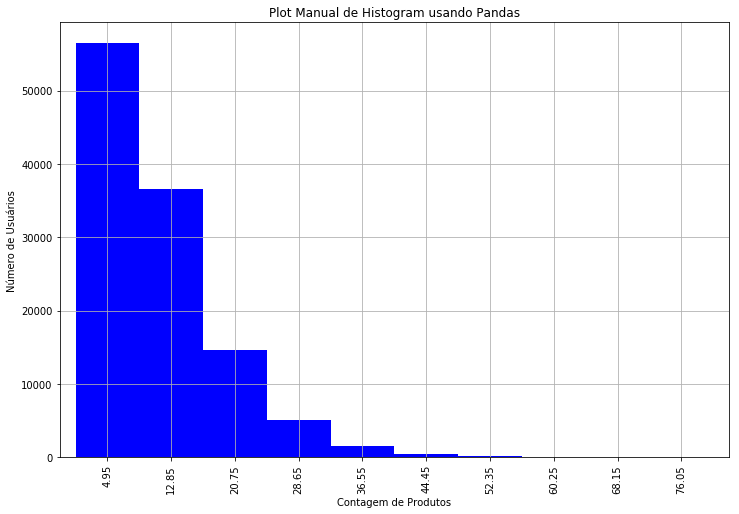

In [45]:
histogram.plot(kind="bar", color="blue", figsize=(12,8), width=1, grid=True)
plt.title("Plot Manual de Histogram usando Pandas")
plt.xlabel("Contagem de Produtos")
plt.ylabel("Número de Usuários")
plt.show()

##### Matplotlib Puro

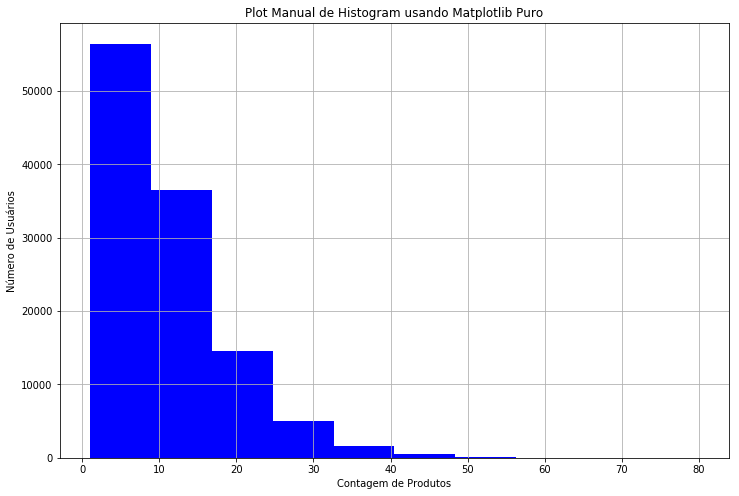

In [46]:
plt.figure(figsize=(12,8))
plt.bar(histogram.index, histogram.values, color="blue", width=7.9)
plt.title("Plot Manual de Histogram usando Matplotlib Puro")
plt.grid(True)
plt.xlabel("Contagem de Produtos")
plt.ylabel("Número de Usuários")
plt.show()

## Comparando diferentes números de Buckets

Usando o método `hist` do `pandas`, plotar o histograma com `bins=20` **por cima da mesma figura construída anteriormente**. 

O gráfico composto deve ter as seguintes características:
- O gráfico original (`bins=10`) deve ser plotado primeiro, em **azul**;
- O gráfico gerado pelo médoto `hist` deve ser plotado por cima do original, em **vermelho**;
- Ambos os gráficos devem estar visíveis (usar **transparência**);
- Deve haver uma legenda identificando os dois gráficos.


##### Nota: 

Na solução desse desafio, notou-se um problema ao usar o `barplot` do `pandas` associado com qualquer método de histograma. Esse problema é na interpretação dos valores do domínio (`x`), fazendo com que os gráficos não fiquem alinhados.

Para que a solução dê certo, é necessário que se use **apenas para o bar plot** a solução de `matplotlib` puro.

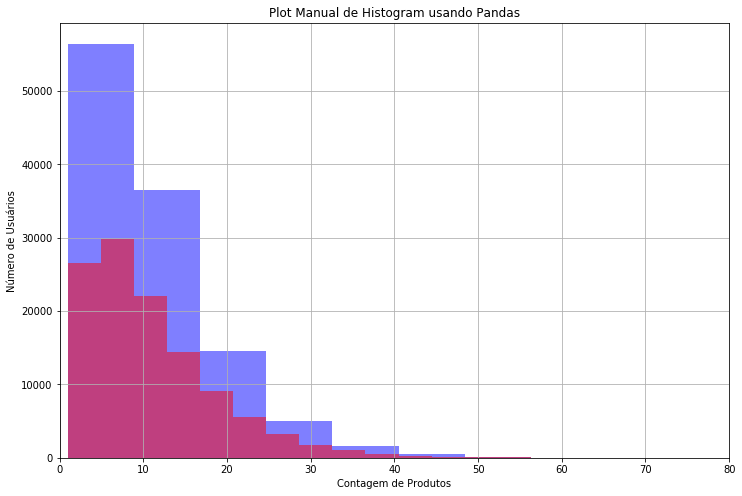

In [47]:
fig = plt.figure(figsize=(12,8))
plt.bar(histogram.index, histogram.values, color="blue", width=7.9, alpha=0.5)
product_count.hist(bins=20, color="red", alpha=0.5, ax=plt.gca())
plt.title("Plot Manual de Histogram usando Pandas")
plt.xlabel("Contagem de Produtos")
plt.ylabel("Número de Usuários")
plt.xlim(0,80)
plt.show()
